In [1]:
import openpiv.tools
import openpiv.process
import openpiv.scaling
import openpiv.validation
import openpiv.filters
import openpiv.pyprocess
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
frame_a  = openpiv.tools.imread( '/Users/prakash/Desktop/1.tif' )
frame_b  = openpiv.tools.imread( '/Users/prakash/Desktop/2.tif' )

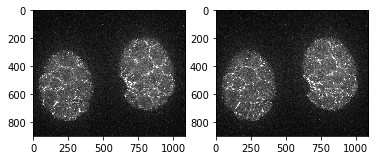

In [3]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(frame_a,cmap=plt.cm.gray)
ax[1].imshow(frame_b,cmap=plt.cm.gray)

In [4]:
winsize = 32 # pixels
searchsize = 64  # pixels, search in image B
overlap = 16 # pixels
dt = 1./300. # sec

u0, v0, sig2noise = openpiv.process.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), window_size=winsize, overlap=overlap, dt=dt, search_area_size=searchsize, sig2noise_method='peak2peak' )

In [5]:
x, y = openpiv.process.get_coordinates( image_size=frame_a.shape, window_size=winsize, overlap=overlap )

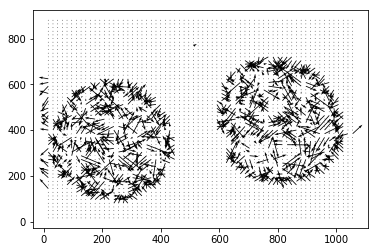

In [6]:
plt.quiver( x, y, u0, v0 )

In [23]:
x[0]

array([0.00903358, 0.01806715, 0.02710073, 0.03613431, 0.04516788,
       0.05420146, 0.06323504, 0.07226861, 0.08130219, 0.09033577,
       0.09936934, 0.10840292, 0.1174365 , 0.12647007, 0.13550365,
       0.14453723, 0.1535708 , 0.16260438, 0.17163796, 0.18067153,
       0.18970511, 0.19873869, 0.20777226, 0.21680584, 0.22583942,
       0.23487299, 0.24390657, 0.25294015, 0.26197372, 0.2710073 ,
       0.28004088, 0.28907445, 0.29810803, 0.30714161, 0.31617518,
       0.32520876, 0.33424234, 0.34327591, 0.35230949, 0.36134307,
       0.37037664, 0.37941022, 0.3884438 , 0.39747737, 0.40651095,
       0.41554453, 0.4245781 , 0.43361168, 0.44264526, 0.45167883,
       0.46071241, 0.46974599, 0.47877956, 0.48781314, 0.49684672,
       0.50588029, 0.51491387, 0.52394745, 0.53298102, 0.5420146 ,
       0.55104818, 0.56008175, 0.56911533, 0.57814891, 0.58718248,
       0.59621606])

In [15]:
np.mean(sig2noise)

1.685080908644688

In [8]:
u1, v1, mask = openpiv.validation.sig2noise_val( u0, v0, sig2noise, threshold = 1.2 )

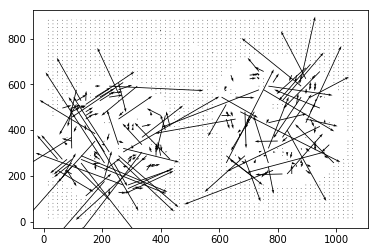

In [9]:
plt.quiver( x, y, u1, v1 )

In [10]:
u2, v2 = openpiv.filters.replace_outliers( u1, v1, method='localmean', max_iter=10, kernel_size=2)

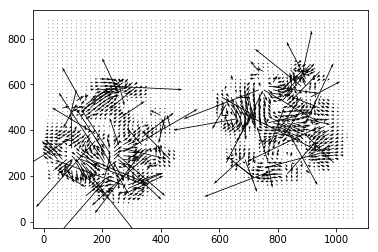

In [11]:
plt.quiver( x, y, u2, v2 )

In [12]:
x, y, u3, v3 = openpiv.scaling.uniform(x, y, u2, v2, scaling_factor = 5.9039*300 )

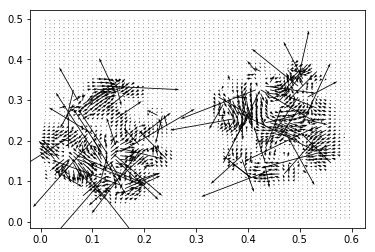

In [13]:
plt.quiver( x, y, u3, v3 )